In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv(r'D:\Kedar\Python\DataSet\Kaggle\netflix_titles.csv')
print('Done!')

Done!


# Data Investigation

In [3]:
def data_inv(df):
    print('netflix movies and shows: ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*10)
    print('dateset columns: \n')
    print(df.columns)
    print('-'*10)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(df)

netflix movies and shows:  8807
dataset variables:  12
----------
dateset columns: 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
----------
data-type of each column: 

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
----------
missing rows in each column: 

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


# Data Cleaning

In [7]:
df=df.drop('show_id',axis=1)

In [8]:
df['cast']=df['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
        lst=cast.split(', ')
        length=len(lst)
        return length
df['number_of_cast']=df['cast'].apply(cast_counter)
df['cast']=df['cast'].replace('Unknown',np.nan)

In [10]:
df=df.reset_index()

In [12]:
df.rating = df.rating.fillna(df.rating.mode()[0])

In [15]:
for i,j in zip(df['country'].values,df.index):
    if i==np.nan:
        if ('Anime' in df.loc[j,'listed_in']) or ('anime' in df.loc[j,'listed_in']):
                df.loc[j,'country']='Japan'
        else:
            continue
    else:
        continue

In [17]:
df=df.drop('date_added',axis=1)

In [18]:
df.dtypes

index              int64
type              object
title             object
director          object
cast              object
country           object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
number_of_cast     int64
dtype: object

In [20]:
for i in df.index:          # replacing UR by NR
    if df.loc[i,'rating']=='UR':
        df.loc[i,'rating']='NR'

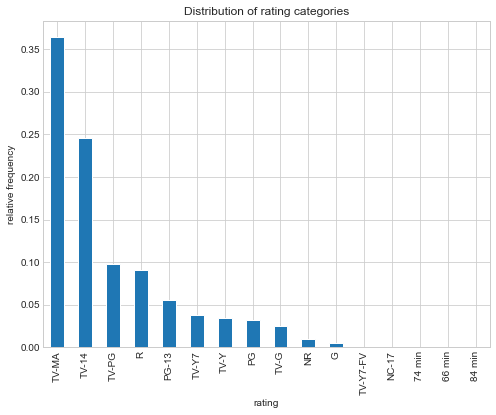

In [21]:
plt.figure(figsize=(8,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

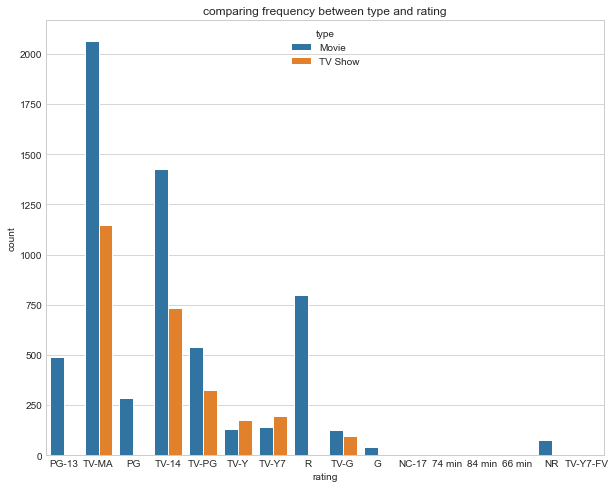

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

In [23]:
df['country'].value_counts().sort_values(ascending=False)

United States                                         2818
India                                                  972
United Kingdom                                         419
Japan                                                  245
South Korea                                            199
                                                      ... 
Somalia, Kenya, Sudan, South Africa, United States       1
United States, France, United Kingdom, Japan             1
United States, Cambodia, Romania                         1
Venezuela                                                1
Poland,                                                  1
Name: country, Length: 748, dtype: int64

In [24]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='South Korea')|(df['country']=='Spain')]

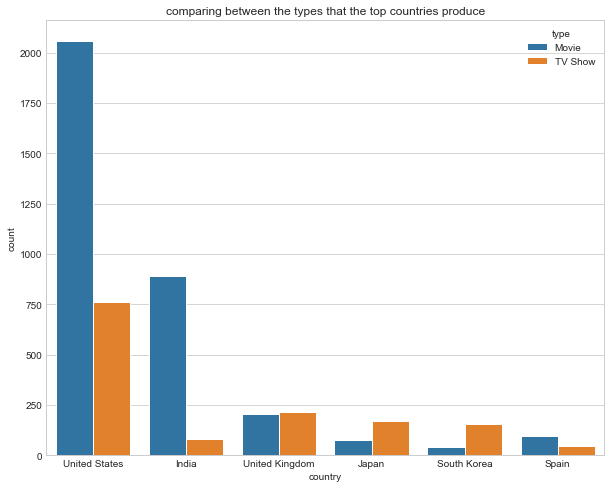

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

# UK and Japan produces TV-Shows more than Movies

In [30]:
for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

United States
TV-MA       32.931157
R           15.613911
TV-14       14.407381
PG-13       10.255500
TV-PG        8.907026
PG           5.819730
TV-Y7        3.584102
TV-Y         3.087296
TV-G         2.909865
NR           1.277502
G            1.029099
TV-Y7-FV     0.035486
74 min       0.035486
66 min       0.035486
84 min       0.035486
NC-17        0.035486
Name: rating, dtype: float64
----------
India
TV-14       56.584362
TV-MA       25.514403
TV-PG       13.786008
TV-Y7        1.440329
TV-G         0.925926
TV-Y         0.514403
PG-13        0.411523
NR           0.411523
PG           0.205761
TV-Y7-FV     0.102881
R            0.102881
Name: rating, dtype: float64
----------
United Kingdom
TV-MA    42.243437
TV-PG    17.899761
TV-14    17.183771
R         7.875895
TV-G      5.489260
TV-Y      4.534606
PG-13     1.909308
NR        1.193317
TV-Y7     1.193317
PG        0.477327
Name: rating, dtype: float64
----------
Japan
TV-14    37.142857
TV-MA    35.918367
TV-PG    15.91836